In [1]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-200')     # GLoVE vectors trained on Twitter with dimension 200

[==================================================] 100.0% 758.5/758.5MB downloaded


In [3]:
import numpy as np

def normalize(x):
    return x / np.linalg.norm(x, axis=-1, keepdims=True)

x = np.array([1,2,3,4,5])
x = normalize(x)
x       # normalized vector

array([0.13483997, 0.26967994, 0.40451992, 0.53935989, 0.67419986])

In [4]:
y = np.array([1,2,3,3,5])
y = normalize(y)

# dot product -> cosine similarity
np.dot(x, y)

0.992586153805942

In [5]:
# or you can use @ operator
x @ y

0.992586153805942

In [6]:
vec_1 = normalize(glove_vectors['hello'])
vec_2 = normalize(glove_vectors['bye'])

vec_1 @ vec_2

0.6177672

In [7]:
vec_1 = normalize(glove_vectors['hello'])
vec_2 = normalize(glove_vectors['machine'])

vec_1 @ vec_2

0.32753447

$$ Attention(Q, K, V) = softmax\left(\frac{QK^T}{\sqrt{d_k}}\right)V $$

In [8]:
# 'key' matrix = sequence of vectors
in_sequence = normalize(np.random.randn(4, 128))        # 4 tokens, each 128-d emb/vec

query = normalize(np.arange(128))

# compare a vector against a sequence of vectors
query @ in_sequence.T       # (128,) x (128, 4) = (4,) -> cosine similarity with each token in the sequence

array([ 0.07622913,  0.10987198, -0.05420416,  0.01880638])

In [9]:
queries = normalize(np.random.randn(4, 128))         # 4 tokens, each 128-d emb/vec
keys = normalize(np.random.randn(3, 128))            # 3 tokens, each 128-d emb/vec

# compare a sequence of 4 vectors against a sequence of 3 vectors
# (num_tokens_1, emb_dim) x (emb_dim, num_tokens_2) = (num_tokens_1, num_tokens_2)
queries @ keys.T

array([[ 0.00380556,  0.01195876,  0.01195057],
       [-0.12319376, -0.01285992,  0.00653526],
       [ 0.12969666, -0.02350756, -0.11047813],
       [-0.07917276,  0.08262219,  0.08057386]])

In [10]:
# softmax -> probability distribution, sum equal to 1
def softmax(x):
    x = np.exp(x)
    return x / np.sum(x)

query = normalize(np.random.randn(128))
keys = normalize(np.random.randn(3, 128))

# use softmax as 'weights' that sum up to one
softmax(query @ keys.T)

array([0.3525399 , 0.29142204, 0.35603807])

In [11]:
# full attention
query = normalize(np.random.randn(128))
keys = normalize(np.random.randn(3, 128))
values = normalize(np.random.randn(3, 128))     # note: values must have the same length as keys

# weighted sum of 'values' vectors. the weights are decided by how the 'keys' are similar to 'query
softmax(query @ keys.T) @ values            # same shape as query

array([ 3.68440978e-02, -4.84877724e-02,  7.95368644e-02, -1.21765765e-02,
        4.16230087e-02,  1.18530512e-01, -2.21454919e-02,  4.81434258e-02,
       -4.13908067e-02, -5.85944649e-02,  6.15580798e-02,  4.63641686e-02,
        1.92821822e-02,  1.05393814e-02,  7.21628110e-03, -1.11924375e-03,
        1.36338420e-03, -8.10714484e-02, -7.57107774e-02, -9.04706587e-02,
        2.38246177e-02,  2.01255779e-02, -3.52501026e-02,  5.16096075e-02,
        4.29554589e-02,  6.51930744e-03, -4.03878811e-02,  4.08813629e-02,
       -1.25617253e-02, -7.84712223e-03, -1.34933475e-04, -4.15138221e-02,
       -1.08136026e-01, -3.03348364e-02,  5.97634141e-02,  5.72888657e-02,
        3.55358202e-03, -1.06645684e-02,  5.80513524e-02,  6.10812180e-02,
        4.53508340e-02, -5.15459928e-02, -1.72542682e-03, -5.46616616e-02,
       -2.48087697e-03, -1.21371138e-01,  1.49388976e-01, -8.53885964e-02,
        4.57957934e-02,  1.16754777e-02, -7.22530838e-02,  3.31105384e-02,
        4.81493429e-02, -

In [12]:
# matrix multiplication for speed up
queries = normalize(np.random.randn(4, 128))        # sequence of vectors
keys = normalize(np.random.randn(3, 128))
values = normalize(np.random.randn(3, 128))

attention_output = softmax(queries @ keys.T) @ values
attention_output.shape          # same shape as queries

(4, 128)

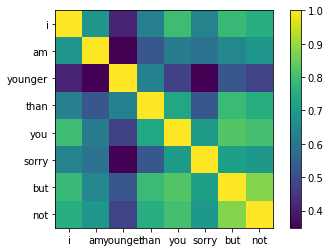

In [14]:
import matplotlib.pyplot as plt

def tokens_to_vectors(tokens):
    vectors = [normalize(glove_vectors[x]) for x in tokens]
    return np.stack(vectors, axis=0)

def visualize_attention(attn_matrix, tokens_1, tokens_2):
    plt.imshow(attn_matrix)
    plt.colorbar()
    plt.xticks(range(len(tokens_2)), tokens_2)
    plt.yticks(range(len(tokens_1)), tokens_1)

# self-attention: Q = K = V
sentence = 'i am younger than you sorry but not'
tokens = sentence.split()
vectors = tokens_to_vectors(tokens)

q = k = v = vectors
attn_w = q @ k.T

visualize_attention(attn_w, tokens, tokens)

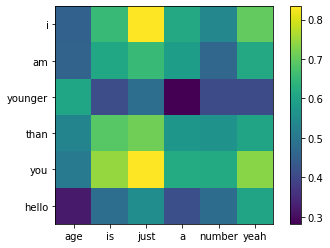

In [16]:
# cross-attention: Q != K = V
sent_1 = 'i am younger than you hello'
sent_2 = 'age is just a number yeah'

tokens_1 = sent_1.split()
vectors_1 = tokens_to_vectors(tokens_1)
tokens_2 = sent_2.split()
vectors_2 = tokens_to_vectors(tokens_2)

q = vectors_1
k = v = vectors_2
attn_w = q @ k.T

visualize_attention(attn_w, tokens_1, tokens_2)

In [19]:
import torch

def attention(q, k, v):
    return torch.softmax(q @ k.T, dim=-1) @ v

class AttentionModule(torch.nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.q_w = torch.nn.Parameter(torch.randn(in_dim, out_dim))
        self.k_w = torch.nn.Parameter(torch.randn(in_dim, out_dim))
        self.v_w = torch.nn.Parameter(torch.randn(in_dim, out_dim))

    def forward(self, q, k, v):
        projected_q = q @ self.q_w
        projected_k = k @ self.k_w
        projected_v = v @ self.v_w
        return attention(projected_q, projected_k, projected_v)

# test run
m = AttentionModule(200, 256)
x = torch.rand(10, 200)     # test sample
m(x, x, x).shape            # no error

torch.Size([10, 256])

In [20]:
class MultiHeadAttention(torch.nn.Module):
    def __init__(self, in_dim, out_dim, num_heads):
        super().__init__()
        self.heads = torch.nn.ModuleList([AttentionModule(in_dim, out_dim) for _ in range(num_heads)])
        self.output_w = torch.nn.Parameter(torch.randn(out_dim*num_heads, out_dim))

    def forward(self, q, k, v):
        outputs = [head(q, k, v) for head in self.heads]
        outputs = torch.concat(outputs, dim=-1)
        outputs = outputs @ self.output_w
        return outputs


m = MultiHeadAttention(200, 256, 4)
x = torch.rand(10, 200)
m(x, x, x).shape

torch.Size([10, 256])

In [21]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz   # download
!tar -xf aclImdb_v1.tar.gz                                         # unzip / untar

--2022-02-17 12:21:00--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  32.3MB/s    in 2.5s    

2022-02-17 12:21:03 (32.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [22]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
en_stopwords = set(stopwords.words('english'))      # make it a set for fast lookup O(1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
import os
import pandas as pd
import string
import re


def load_samples(dir):
    files = os.listdir(dir)
    samples = []
    for file in files:
        with open(os.path.join(dir, file)) as f:
            sample = ''.join(f.readlines())
            samples.append(sample)
    return samples

train_pos_samples = load_samples('aclImdb/train/pos')
train_neg_samples = load_samples('aclImdb/train/neg')
val_pos_samples = load_samples('aclImdb/test/pos')
val_neg_samples = load_samples('aclImdb/test/neg')

train_samples = [(x, 1) for x in train_pos_samples] + [(x, 0) for x in train_neg_samples]
val_samples = [(x, 1) for x in val_pos_samples] + [(x, 0) for x in val_neg_samples]

df_train = pd.DataFrame(train_samples, columns=['text', 'label'])
df_val = pd.DataFrame(val_samples, columns=['text', 'label'])

In [24]:
def clean_and_tokenize(text):
    text = text.lower()                     # lowercase
    text = text.replace('<br />', '')       # remove line break token
    tokens = text.split()                   # split into words / whitespace tokenize
    tokens = [x for x in tokens if x not in en_stopwords]       # remove stopwords
    text = ' '.join(tokens)                 # combine tokens into a sentence
    for punc in string.punctuation:         # removing punctuations
        text = text.replace(punc, ' ')
    text = re.sub('\s+', ' ', text)         # > 1 whitespace -> 1 whitespace
    text = text.strip()
    tokens = text.split()
    tokens = [x for x in tokens if len(x) > 2]      # words > 2 characters
    return tokens

def tokens_to_vectors(tokens):
    vecs = [glove_vectors[token] for token in tokens if token in glove_vectors]
    return np.stack(vecs, axis=0)

train_sent_tokens = [clean_and_tokenize(x) for x in df_train['text'].tolist()]
val_sent_tokens = [clean_and_tokenize(x) for x in df_val['text'].tolist()]

train_vecs = [tokens_to_vectors(tokens) for tokens in train_sent_tokens]
val_vecs = [tokens_to_vectors(tokens) for tokens in val_sent_tokens]

In [25]:
x = torch.rand(10,20)
torch.arange(x.numel()).reshape(x.shape)

tensor([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
          34,  35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
          54,  55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
          74,  75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
          94,  95,  96,  97,  98,  99],
        [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
         114, 115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139],
        [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159],
        [160, 161, 162, 163, 164, 165, 166, 167,

In [29]:
class Block(torch.nn.Module):
    def __init__(self, in_dim, out_dim, num_heads):
        super().__init__()
        self.residual = in_dim == out_dim
        self.attn_heads = MultiHeadAttention(in_dim, out_dim, num_heads)
        self.norm_1 = torch.nn.LayerNorm(out_dim)
        self.ffn = torch.nn.Sequential(
            torch.nn.Linear(out_dim, out_dim),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(out_dim, out_dim)
        )
        self.norm_2 = torch.nn.LayerNorm(out_dim)

    def forward(self, in_sequence):
        out_1 = self.attn_heads(in_sequence, in_sequence, in_sequence)
        if self.residual:
            out_1 = in_sequence + out_1
        out_1 = self.norm_1(out_1)

        out_2 = self.ffn(out_1)
        out_2 = self.norm_2(out_1 + out_2)
        
        return out_2

class Model(torch.nn.Module):
    def __init__(self, in_dim, out_dim, num_heads):
        super().__init__()
        self.block_1 = Block(in_dim, out_dim, num_heads)
        self.block_2 = Block(out_dim, out_dim, num_heads)

        self.classifier = torch.nn.Linear(out_dim, 1)

    
    def forward(self, sequence):
        pe = torch.arange(sequence.numel(), dtype=torch.float, device=sequence.device).reshape(sequence.shape)     # positional encoding
        pe = pe / torch.linalg.norm(pe, dim=-1, keepdims=True)
        out = sequence + pe

        out = self.block_1(out)
        out = self.block_2(out)

        out = torch.mean(out, dim=0, keepdims=True)
        out = self.classifier(out)
        return out.squeeze()

m = Model(200, 256, 4)
m(torch.rand(10,200))

tensor(-0.2389, grad_fn=<SqueezeBackward0>)

In [30]:
from torch.utils.data import Dataset, DataLoader

class ReviewDataset(Dataset):
    def __init__(self, vectors, labels):
        self.vectors = vectors
        self.labels = labels

    def __getitem__(self, idx):
        return self.vectors[idx], self.labels[idx]

    def __len__(self):
        return len(self.vectors)

train_ds = ReviewDataset(train_vecs, df_train['label'].tolist())
val_ds = ReviewDataset(val_vecs, df_val['label'].tolist())

# batching problem
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False)

In [31]:
import torch.nn.functional as F
from tqdm import tqdm


device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Model(200, 256, 4)
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

n_epochs = 10

for i in range(n_epochs):
    print(f'Epoch{i}')
    pbar = tqdm(train_loader)
    for vecs, labels in pbar:
        vecs = vecs.to(device)
        logits = model(vecs[0])
        loss = F.binary_cross_entropy_with_logits(logits, labels[0].to(device).float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_description(f'Loss: {loss.item():.4f}')

Epoch0


Loss: 0.5503:  11%|█▏        | 2830/25000 [01:03<08:21, 44.25it/s]


KeyboardInterrupt: ignored

In [33]:
model.eval()

preds = []
targets = []
for vecs, labels in tqdm(val_loader):
    with torch.inference_mode():
        preds.append(model(vecs.to(device)[0]))
    targets.append(labels[0])

 13%|█▎        | 3340/25000 [00:21<02:17, 157.90it/s]


KeyboardInterrupt: ignored

In [34]:
preds = torch.stack(preds, dim=0)
targets = torch.tensor(targets)

In [36]:
acc = ((preds > 0).cpu() == targets).sum() / len(preds)
acc

tensor(0.6087)

In [38]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.5 MB/s 
     |████████████████████████████████| 596 kB 39.9 MB/s 
     |████████████████████████████████| 6.8 MB 30.1 MB/s 
     |████████████████████████████████| 67 kB 642 kB/s 
     |████████████████████████████████| 895 kB 10.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# pre-training on internet data
# fine-tune on downstream

# encoders: BERT - bi-directional encoder representations from transformers
# what is uni-directional and bi-directional transformer?
# albert, roberta, distilbert -> what's the difference?

# decoders: GPT-family 1, 2, 3
# text generation

# encoder-decoder (seq2seq): T5
# text summarization
# machine translation

In [63]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = 'roberta-base'

tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model, num_labels=2)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [64]:
text = 'I am Thien'
outputs = tokenizer(text)
outputs

{'input_ids': [0, 100, 524, 2032, 2495, 2], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [65]:
# sub-word tokenization: (1) efficient encoding of text, (2) multilingual model (utf-8)
# BPE, wordpiece, sentencepiece
# special tokens
for x in outputs['input_ids']:
    print(tokenizer.decode(x), end=" ")

<s> I  am  Th ien </s> 

In [71]:
for x in 'Thiên'.encode('utf-8'):
    print(x)

84
104
105
195
170
110


In [75]:
for x in tokenizer('Thiên')['input_ids']:
    print(tokenizer.decode(x), end=' ')

<s> Th i ê n </s> 